# Ridge and Lasso Regression - Lab

## Introduction

In this lab, you'll practice your knowledge on Ridge and Lasso regression!

## Objectives

You will be able to:

- Use Lasso and ridge regression in Python
- Compare Lasso and Ridge with standard regression

## Housing Prices Data

Let's look at yet another house pricing data set.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Housing_Prices/train.csv')

Look at df.info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We'll make a first selection of the data by removing some of the data with `dtype = object`, this way our first model only contains **continuous features**

Make sure to remove the SalesPrice column from the predictors (which you store in `X`), then replace missing inputs by the median per feature.

Store the target in `y`.

In [11]:
# Load necessary packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# remove "object"-type features and SalesPrice from `X`
features=[]
for col in df.columns:
    if df[col].dtype!=object:
        features.append(col)
X=df[features].drop(columns='SalePrice')
# Impute null values
for col in X.columns:
    median=np.median(X[col])
    X.fillna(median,inplace=True)

# Create y
y=df['SalePrice']


Look at the information of `X` again

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

## Let's use this data to perform a first naive linear regression model

Compute the R squared and the MSE for both train and test set.

In [13]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Fit the model and print R2 and MSE for train and test
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_hat_train=linreg.predict(X_train)
y_hat_test=linreg.predict(X_test)



In [14]:
mse_train=mean_squared_error(y_train,y_hat_train)
mse_test=mean_squared_error(y_test,y_hat_test)
r2_train= linreg.score(X_train,y_train)
r2_test=linreg.score(X_test,y_test)

print(f'train r2: {r2_train} train MSE: {mse_train}')
print(f'test r2: {r2_test} test MSE: {mse_test}')

train r2: 0.8414419133493232 train MSE: 980395644.7599072
test r2: 0.690447398762667 test MSE: 2061518878.1203516


## Normalize your data

We haven't normalized our data, let's create a new model that uses `preprocessing.scale` to scale our predictors!

In [15]:
from sklearn import preprocessing

# Scale the data and perform train test split
X_scale=preprocessing.scale(X)



Perform the same linear regression on this data and print out R-squared and MSE.

In [20]:
# Your code here
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X,y)

# Fit the model and print R2 and MSE for train and test
linreg_scale=LinearRegression()
linreg_scale.fit(X_train_scale,y_train_scale)
y_hat_train_scale=linreg_scale.predict(X_train_scale)
y_hat_test_scale=linreg_scale.predict(X_test_scale)

mse_train_scale=mean_squared_error(y_train_scale,y_hat_train_scale)
mse_test_scale=mean_squared_error(y_test_scale,y_hat_test_scale)
r2_train_scale= linreg_scale.score(X_train_scale,y_train_scale)
r2_test_scale=linreg_scale.score(X_test_scale,y_test_scale)

print(f'train_scale r2: {r2_train_scale} train MSE: {mse_train_scale}')
print(f'test_scale r2: {r2_test_scale} test MSE: {mse_test_scale}')

train_scale r2: 0.8510100255051221 train MSE: 871400286.8343427
test_scale r2: 0.708238420242603 test MSE: 2239717598.811133


## Include dummy variables

We haven't included dummy variables so far: let's use our "object" variables again and create dummies

In [24]:
# Create X_cat which contains only the categorical variables
features_cat=[]
for col in df.columns:
    if df[col].dtype==object:
        features_cat.append(col)
X_cat=df[features_cat]


In [25]:
# Make dummies
X_cat=pd.get_dummies(X_cat)

In [29]:
X_cat.shape

(1460, 252)

Merge `x_cat` together with our scaled `X` so you have one big predictor dataframe.

In [33]:
# Your code here
X_full=pd.concat([pd.DataFrame(X_scale),X_cat],axis=1)

In [34]:
X_full.shape

(1460, 289)

Perform the same linear regression on this data and print out R-squared and MSE.

In [35]:
# Your code here
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full,y)

# Fit the model and print R2 and MSE for train and test
linreg_full=LinearRegression()
linreg_full.fit(X_train_full,y_train_full)
y_hat_train_full=linreg_full.predict(X_train_full)
y_hat_test_full=linreg_full.predict(X_test_full)

mse_train_full=mean_squared_error(y_train_full,y_hat_train_full)
mse_test_full=mean_squared_error(y_test_full,y_hat_test_full)
r2_train_full= linreg_full.score(X_train_full,y_train_full)
r2_test_full=linreg_full.score(X_test_full,y_test_full)

print(f'train_full r2: {r2_train_full} train MSE: {mse_train_full}')
print(f'test_full r2: {r2_test_full} test MSE: {mse_test_full}')

train_full r2: 0.937541234618372 train MSE: 380866586.6255708
test_full r2: -8.475927681607207e+19 test MSE: 5.876221024354903e+29


Notice the severe overfitting above; our training R squared is quite high, but the testing R squared is negative! Our predictions are far far off. Similarly, the scale of the Testing MSE is orders of magnitude higher then that of the training.

## Perform Ridge and Lasso regression

Use all the data (normalized features and dummy categorical variables) and perform Lasso and Ridge regression for both! Each time, look at R-squared and MSE.

## Lasso

With default parameter (alpha = 1)

In [38]:
# Your code here
from sklearn.linear_model import Ridge, Lasso
lasso1=Lasso(alpha=1)
lasso1.fit(X_train_full,y_train_full)

y_hat_train_lasso1=lasso1.predict(X_train_full)
y_hat_test_lasso1=lasso1.predict(X_test_full)

mse_train_lasso1=mean_squared_error(y_train_full,y_hat_train_lasso1)
mse_test_lasso1=mean_squared_error(y_test_full,y_hat_test_lasso1)
r2_train_lasso1= lasso1.score(X_train_full,y_train_full)
r2_test_lasso1=lasso1.score(X_test_full,y_test_full)

print(f'train_lassol r2: {r2_train_lasso1} train_lassol MSE: {mse_train_lasso1}')
print(f'test_lassol r2: {r2_test_lasso1} test_lassol MSE: {mse_test_lasso1}')

train_lassol r2: 0.9353139089158753 train_lassol MSE: 394448570.3940632
test_lassol r2: 0.8950681409863104 test_lassol MSE: 727475291.4644586


With a higher regularization parameter (alpha = 10)

In [42]:
lasso10=Lasso(alpha=10)
lasso10.fit(X_train_full,y_train_full)

y_hat_train_lasso10=lasso10.predict(X_train_full)
y_hat_test_lasso10=lasso10.predict(X_test_full)

mse_train_lasso10=mean_squared_error(y_train_full,y_hat_train_lasso10)
mse_test_lasso10=mean_squared_error(y_test_full,y_hat_test_lasso10)
r2_train_lasso10= lasso1.score(X_train_full,y_train_full)
r2_test_lasso10=lasso1.score(X_test_full,y_test_full)

print(f'train_lassol r2: {r2_train_lasso10} train_lassol MSE: {mse_train_lasso10}')
print(f'test_lassol r2: {r2_test_lasso10} test_lassol MSE: {mse_test_lasso10}')

train_lassol r2: 0.9353139089158753 train_lassol MSE: 405281942.44206256
test_lassol r2: 0.8950681409863104 test_lassol MSE: 686941966.6324319


## Ridge

With default parameter (alpha = 1)

In [43]:
# Your code here
ridge1=Ridge(alpha=1)
ridge1.fit(X_train_full,y_train_full)

y_hat_train_ridge1=ridge1.predict(X_train_full)
y_hat_test_ridge1=ridge1.predict(X_test_full)

mse_train_ridge1=mean_squared_error(y_train_full,y_hat_train_ridge1)
mse_test_ridge1=mean_squared_error(y_test_full,y_hat_test_ridge1)
r2_train_ridge1= ridge1.score(X_train_full,y_train_full)
r2_test_ridge1=ridge1.score(X_test_full,y_test_full)

print(f'train_ridge1 r2: {r2_train_ridge1} train_ridge1 MSE: {mse_train_ridge1}')
print(f'test_ridge1 r2: {r2_test_ridge1} test_ridge1 MSE: {mse_test_ridge1}')



train_ridge1 r2: 0.9215871124215647 train_ridge1 MSE: 478153044.7644412
test_ridge1 r2: 0.8897901639978179 test_ridge1 MSE: 764066636.4014179


With default parameter (alpha = 10)

In [44]:
# Your code here
ridge10=Ridge(alpha=10)
ridge10.fit(X_train_full,y_train_full)

y_hat_train_ridge10=ridge10.predict(X_train_full)
y_hat_test_ridge10=ridge10.predict(X_test_full)

mse_train_ridge10=mean_squared_error(y_train_full,y_hat_train_ridge10)
mse_test_ridge10=mean_squared_error(y_test_full,y_hat_test_ridge10)
r2_train_ridge10= ridge10.score(X_train_full,y_train_full)
r2_test_ridge10=ridge10.score(X_test_full,y_test_full)

print(f'train_ridge10 r2: {r2_train_ridge10} train_ridge10 MSE: {mse_train_ridge10}')
print(f'test_ridge10 r2: {r2_test_ridge10} test_ridge10 MSE: {mse_test_ridge10}')



train_ridge10 r2: 0.8951833395377954 train_ridge10 MSE: 639160307.5694797
test_ridge10 r2: 0.8911467981887014 test_ridge10 MSE: 754661315.0557346


## Look at the metrics, what are your main conclusions?

Conclusions here

## Compare number of parameter estimates that are (very close to) 0 for Ridge and Lasso

In [47]:
# number of Ridge params almost zero
print(sum(abs(ridge1.coef_) < 10**(-3)))

5


In [48]:
# number of Lasso params almost zero
print(sum(abs(lasso10.coef_) < 10**(-3)))

68


Compare with the total length of the parameter space and draw conclusions!

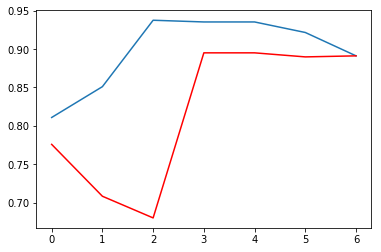

In [62]:
## your code here
r2_trains=[r2_train,r2_train_scale,r2_train_full,r2_train_lasso1,r2_train_lasso10,r2_train_ridge1,r2_test_ridge10]
plt.plot(r2_trains)
r2_tests=[r2_test,r2_test_scale,0.68,r2_test_lasso1,r2_test_lasso10,r2_test_ridge1,r2_test_ridge10]
plt.plot(r2_tests,color='red')
#full dummied at .68 - breaks scale otherwise

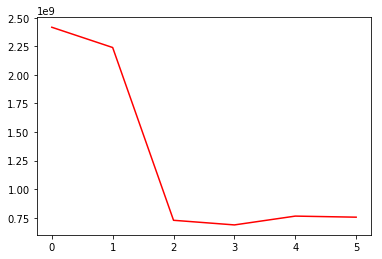

In [63]:
mse_tests=[mse_test,mse_test_scale,mse_test_lasso1,mse_test_lasso10,mse_test_ridge1,mse_test_ridge10]
plt.plot(mse_tests, color='red')
#'full' removed

## Summary

Great! You now know how to perform Lasso and Ridge regression.